# Model that predict who has Health Insurance also be interested in Vehicle Insurance provided by the company

In [1]:
# Data Processing
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score, f1_score, recall_score, precision_score


from sklearn.model_selection import RandomizedSearchCV

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
# id column does not look necessary
df_train = df_train.drop(['id'], axis = 1)
df_test = df_test.drop(['id'], axis = 1)

In [6]:
# Check for NaN values
df_train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df_test.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

### Target Value is Response

Text(0.5, 1.0, 'Response Distribution')

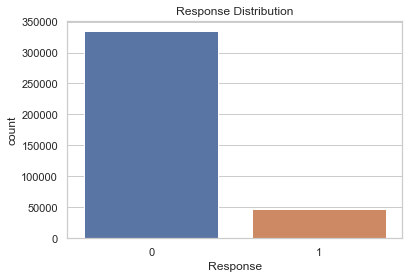

In [9]:
b = sns.countplot(x = 'Response', data = df_train)
b.set_title("Response Distribution")

In [10]:
# A lot of customers that not interested

Text(0.5, 1.0, 'Gender Distribution')

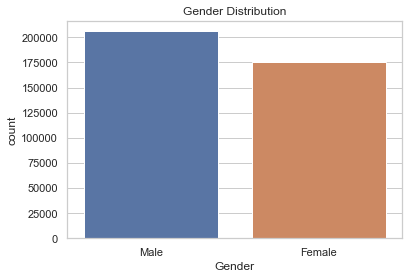

In [11]:
b = sns.countplot(x = 'Gender', data = df_train)
b.set_title("Gender Distribution")

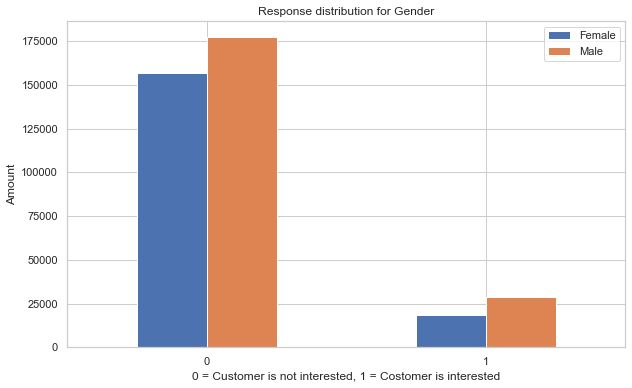

In [12]:
pd.crosstab(df_train['Response'], df_train['Gender']).plot(kind="bar", figsize = (10,6))

plt.title("Response distribution for Gender")
plt.xlabel("0 = Customer is not interested, 1 = Costomer is interested")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [13]:
# Both genders seem to be pretty similar in their response.

### Age


c:\users\lenovo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

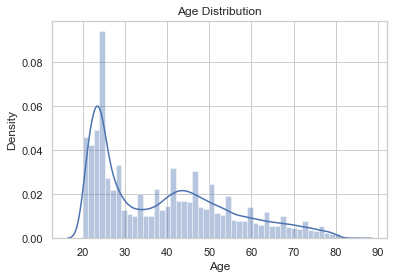

In [15]:
b  = sns.distplot(df_train['Age'])
b.set_title("Age Distribution")

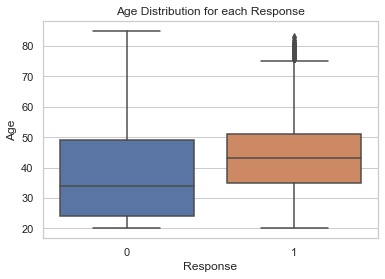

In [16]:
b = sns.boxplot(y='Age', x = 'Response', data = df_train);
b.set_title('Age Distribution for each Response');

### Driving License

In [17]:
df_train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [18]:
# There are only a small number of people with no driving license.

df_train = df_train.drop("Driving_License", axis =1)
df_test = df_test.drop("Driving_License", axis =1)

### Previously_Insured

In [20]:
df_train['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [21]:
pd.crosstab(df_train['Response'], df_train['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


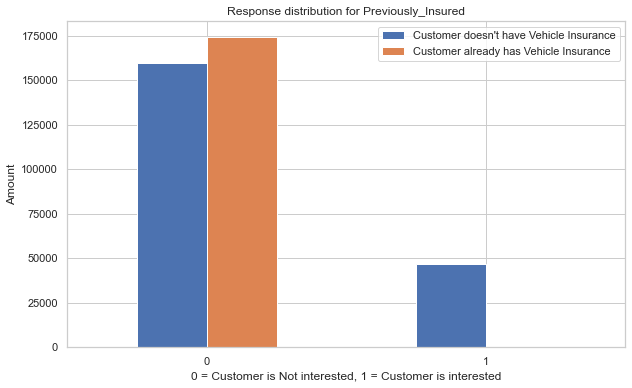

In [22]:
pd.crosstab(df_train['Response'],df_train['Previously_Insured']).plot(kind = 'bar', figsize=(10,6))

plt.title("Response distribution for Previously_Insured")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Customer doesn't have Vehicle Insurance", "Customer already has Vehicle Insurance"])
plt.xticks(rotation=0);

In [23]:
# Customers that already have a vehicle insurance with only very little exception are not interested.

In [24]:
df_train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

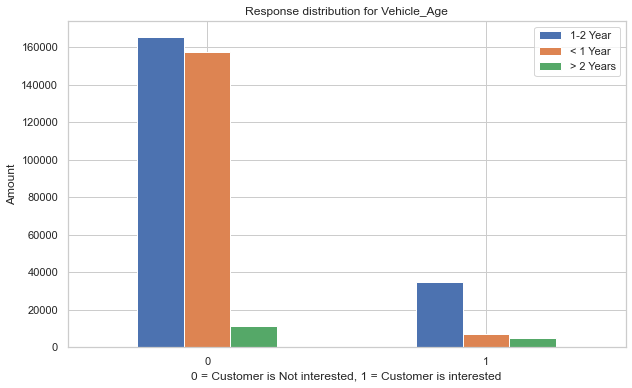

In [25]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Age']).plot(kind="bar", figsize=(10,6))

plt.title("Response distribution for Vehicle_Age")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["1-2 Year", "< 1 Year", "> 2 Years"])
plt.xticks(rotation=0);

In [26]:
df_train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

### Feature Engineering 

In [27]:
df_train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [28]:
# we should get all our data in numeric form.

In [29]:
df_train['Gender'].head()

0      Male
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object

In [30]:
pd.Categorical(df_train['Gender'])


['Male', 'Male', 'Male', 'Male', 'Female', ..., 'Male', 'Male', 'Male', 'Female', 'Male']
Length: 381109
Categories (2, object): ['Female', 'Male']

In [31]:
df_train['Gender'] = pd.Categorical(df_train['Gender'])
df_train['Previously_Insured'] = pd.Categorical(df_train['Previously_Insured'])
df_train['Vehicle_Age'] = pd.Categorical(df_train['Vehicle_Age'])
df_train['Vehicle_Damage'] = pd.Categorical(df_train['Vehicle_Damage'])
df_train['Response'] = pd.Categorical(df_train['Response'])
df_train['Region_Code'] = pd.Categorical(df_train['Region_Code'])

df_train = pd.concat([df_train[['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']],
           pd.get_dummies(df_train[['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']])], axis=1)

In [32]:
df_train.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Previously_Insured_0,Previously_Insured_1,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,40454.0,26.0,217,1,0,1,1,0,0,0,1,0,1
1,76,33536.0,26.0,183,0,0,1,1,0,1,0,0,1,0
2,47,38294.0,26.0,27,1,0,1,1,0,0,0,1,0,1
3,21,28619.0,152.0,203,0,0,1,0,1,0,1,0,1,0
4,29,27496.0,152.0,39,0,1,0,0,1,0,1,0,1,0


In [33]:
# our data is in numeric form!, let's look at the correlation.

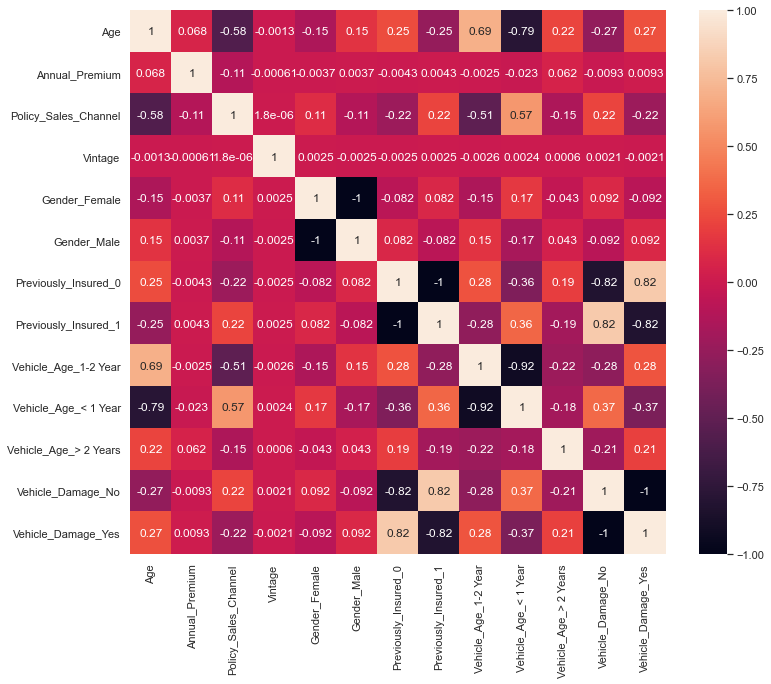

In [34]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

### Modeling

In [35]:
# Check the scores with all features
X = df_train.drop(["Response"], axis =1).to_numpy()
y = df_train["Response"].values

In [36]:
X

array([[4.4000e+01, 4.0454e+04, 2.6000e+01, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [7.6000e+01, 3.3536e+04, 2.6000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.7000e+01, 3.8294e+04, 2.6000e+01, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.1000e+01, 3.5118e+04, 1.6000e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [6.8000e+01, 4.4617e+04, 1.2400e+02, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.6000e+01, 4.1777e+04, 2.6000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [37]:
y

[1, 0, 1, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 381109
Categories (2, int64): [0, 1]

Mean roc_auc_score Logistic Regression : 0.8228638430205478
Mean roc_auc_score Random Forest : 0.8227868036074273
Mean roc_auc_score GradientBoostingClassifier : 0.854707413585548


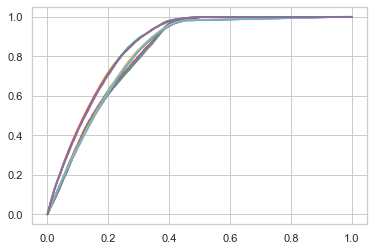

In [38]:
np.random.seed(42)

# Defining a dictionary of models
models = {"Logistic Regression": LogisticRegression(max_iter=10000), 
          "Random Forest": RandomForestClassifier(),
          "GradientBoostingClassifier" : GradientBoostingClassifier()}


# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)




for name, model in models.items():
    
    # Create list for ROC AUC scores
    roc_auc_score_list = []
    
    for train_index, test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)

        roc_auc_score_list.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr)


    print(f'Mean roc_auc_score {name} : {np.mean(roc_auc_score_list)}')

- Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

- The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.

- Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

- Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

- AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.